Images infectées : 13780
Images non infectées : 13780


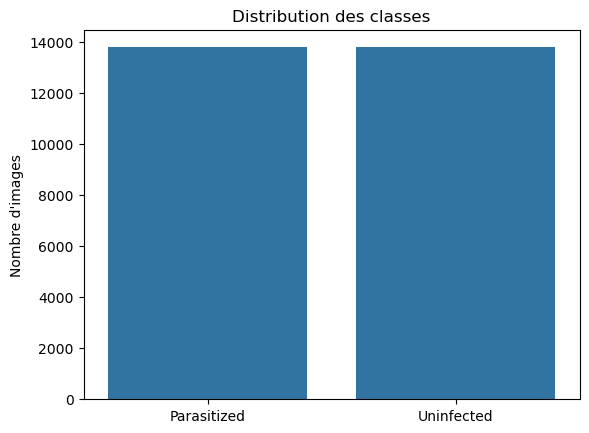

In [2]:
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Chemins
from  pathlib import Path 
path = Path(r"C:\Users\congo\Desktop\cell_images")
data_dir = path
parasitized_dir = os.path.join(data_dir, "Parasitized")
uninfected_dir = os.path.join(data_dir, "Uninfected")

# Nombre d'images par classe
num_parasitized = len(os.listdir(parasitized_dir))
num_uninfected = len(os.listdir(uninfected_dir))

print(f"Images infectées : {num_parasitized}")
print(f"Images non infectées : {num_uninfected}")

# Distribution des classes
sns.barplot(x=["Parasitized", "Uninfected"], y=[num_parasitized, num_uninfected])
plt.title("Distribution des classes")
plt.ylabel("Nombre d'images")
plt.show()


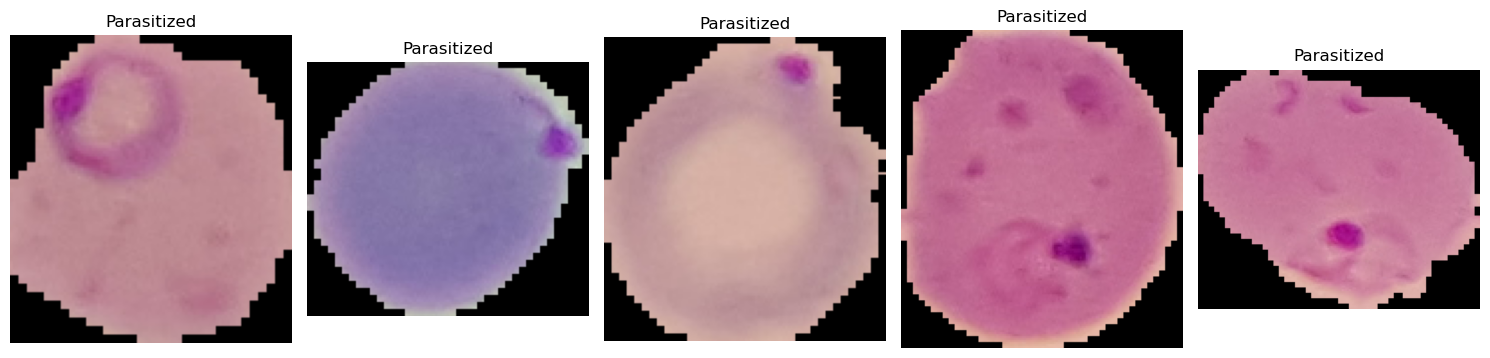

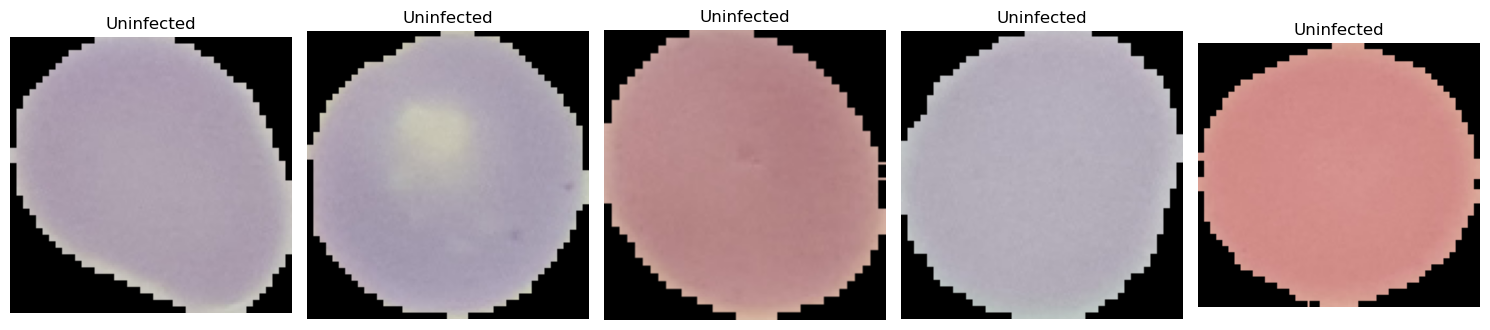

In [3]:
def show_images_from(folder, label, num=5):
    images = random.sample(os.listdir(folder), num)
    plt.figure(figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path)
        plt.subplot(1, num, i + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_images_from(parasitized_dir, "Parasitized")
show_images_from(uninfected_dir, "Uninfected")


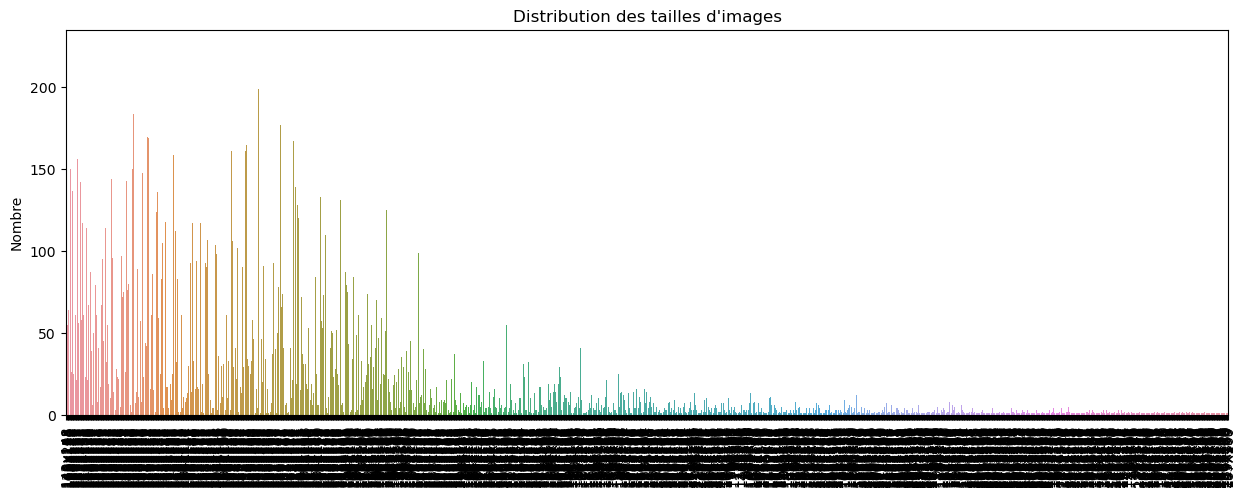

In [7]:
from collections import Counter

def get_image_sizes(folder):
    sizes = []
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        try:
            with Image.open(img_path) as img:
                sizes.append(img.size)
        except:
            pass  # Pour ignorer les images corrompues
    return sizes

sizes_parasitized = get_image_sizes(parasitized_dir)
sizes_uninfected = get_image_sizes(uninfected_dir)

sizes_all = sizes_parasitized + sizes_uninfected
sizes_count = Counter(sizes_all)

# Convertir en liste exploitable
x = ["{}x{}".format(k[0], k[1]) for k in sizes_count.keys()]
y = list(sizes_count.values())

plt.figure(figsize=(15, 5))
sns.barplot(x=x, y=y)
plt.title("Distribution des tailles d'images")
plt.ylabel("Nombre")
plt.xticks(rotation=90)
plt.show()


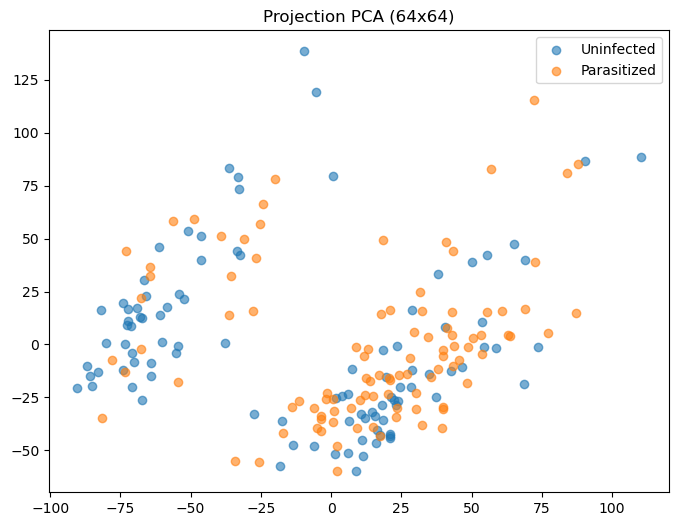

In [4]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def extract_flattened_images(folder, label, num=100):
    images = []
    labels = []
    for img_name in random.sample(os.listdir(folder), num):
        img_path = os.path.join(folder, img_name)
        with Image.open(img_path).resize((64, 64)) as img:
            images.append(np.array(img).flatten())
            labels.append(label)
    return images, labels

img_p, lbl_p = extract_flattened_images(parasitized_dir, 1)
img_u, lbl_u = extract_flattened_images(uninfected_dir, 0)

X = np.array(img_p + img_u)
y = np.array(lbl_p + lbl_u)

# Normaliser
X = StandardScaler().fit_transform(X)

# Réduction avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Affichage
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], label="Uninfected", alpha=0.6)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], label="Parasitized", alpha=0.6)
plt.title("Projection PCA (64x64)")
plt.legend()
plt.show()


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        MaxPooling2D(2, 2),
        
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Sortie binaire
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'data/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'data/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'data/'